In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data_1 = pd.read_csv('MLE.txt')
data_1 = data_1.to_numpy()

alpha = 0.1
prob_1 = 0.5 * (1 + alpha * data_1)

data_prob = np.column_stack((data_1, prob_1))
print(data_prob)


[[ 0.79    0.5395]
 [-0.81    0.4595]
 [ 0.75    0.5375]
 [ 0.49    0.5245]
 [ 0.51    0.5255]
 [-0.53    0.4735]
 [ 0.96    0.548 ]
 [ 0.03    0.5015]
 [ 0.4     0.52  ]
 [-0.51    0.4745]
 [ 0.54    0.527 ]
 [ 0.2     0.51  ]
 [-0.02    0.499 ]
 [ 0.71    0.5355]
 [ 0.68    0.534 ]
 [ 0.9     0.545 ]
 [-0.34    0.483 ]
 [-0.81    0.4595]
 [-0.65    0.4675]]


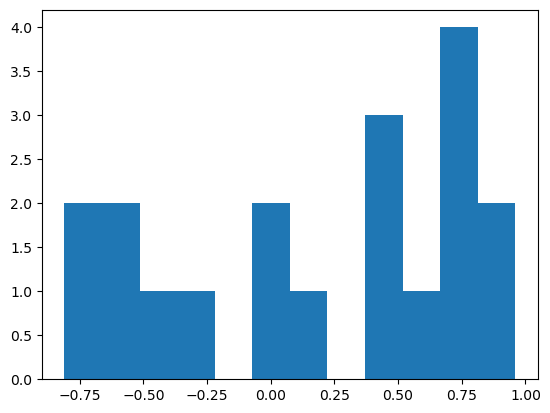

In [2]:
#show the distribution of the data 
plt.hist(data_1, 12)

plt.show()


In [3]:
# calculate the nll
nll = np.sum(np.log(data_1 * prob_1 + 1))# + 1 to make sure all values are positive
print(nll)

1.1164565770504469


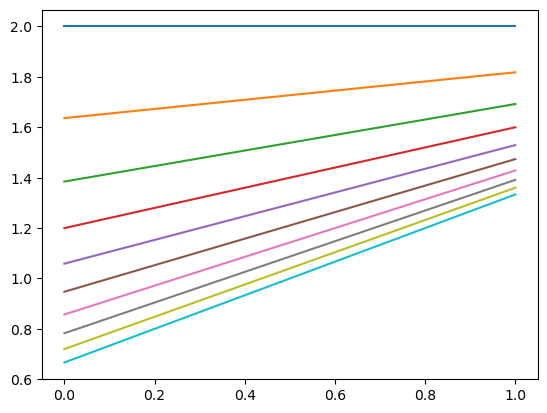

In [4]:
for alpha in np.linspace(0,1, 10):
    x_val = np.linspace(0, 1, 10)
    area = (0.5 + alpha)/2
    probs = 0.5 * (1 + alpha * x_val)/area
    plt.plot(x_val, probs)

In [5]:
data = np.array([0.1, 0.2, 0.3, 0.4, 0.5])
prob = 0.5 * (1 + 0 * data)
nll = - np.sum(np.log(data * prob + 1))

print("uniform distribution nll: ", nll)

uniform distribution nll:  -0.6893273944570799


In [6]:
data = np.array([0.1, 0.1, 0.5, 0.5, 0.5])
prob = 0.5 * (1 + 1 * data_1)

nll = - np.sum(np.log(data * prob + 1))

print("non-uniform distribution nll: ", nll)

non-uniform distribution nll:  -16.419494730420418


C:\Users\janzu\AppData\Local\Temp\ipykernel_11008\636794455.py:8: RuntimeWarning: invalid value encountered in log
  logarit = np.log(multiplication)


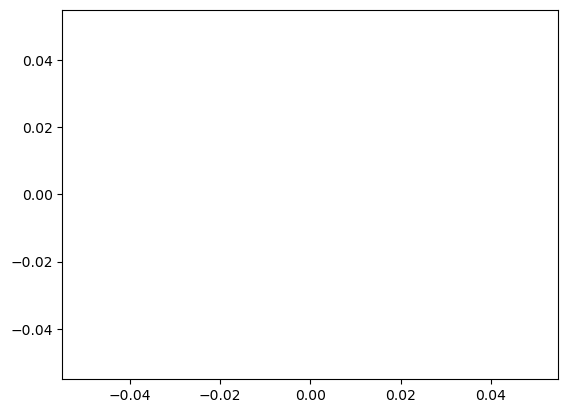

In [7]:
data = pd.read_csv('MLE.txt', header=None).to_numpy().flatten()

alphas = np.linspace(0, 1, 10)
for alpha in alphas:
    prob = 0.5 * (1 + alpha * data)
    
    multiplication = data * prob
    logarit = np.log(multiplication)
    nll = - np.sum(logarit)
    plt.plot(alpha, nll, 'o')

Text(0, 0.5, 'Negative Log-Likelihood')

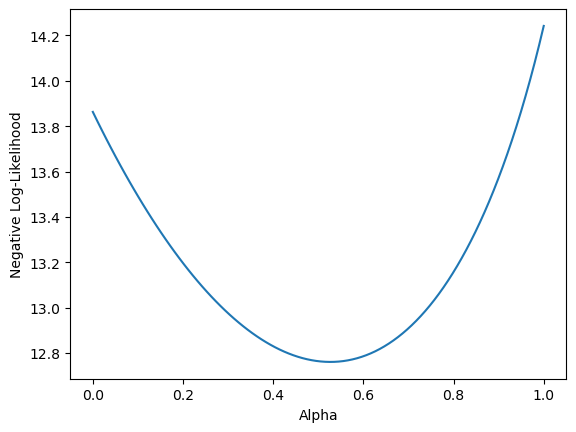

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('MLE.txt', header=None).to_numpy().flatten()

# Define the PDF
def pdf(x, alpha):
    return 0.5 * (1 + alpha * x)

# Define the NLL function
def nll(alpha, data):
    probabilities = pdf(data, alpha)
    return -np.sum(np.log(probabilities))

# Calculate NLL for a range of alpha values
alpha_values = np.linspace(0, 1, 100)
nll_values = [nll(alpha, data) for alpha in alpha_values]

# Plot the NLL
plt.plot(alpha_values, nll_values)
plt.xlabel('Alpha')
plt.ylabel('Negative Log-Likelihood')



# Exercise 2 


In [9]:
from exercise_07 import skeleton_sheet7 as sk


In [10]:
exponential_data = pd.read_csv('exponential_data.txt', header=None).to_numpy().flatten()
print(exponential_data[:5])

[2.36157336 4.33400951 1.54459209 1.0258315  1.52965487]


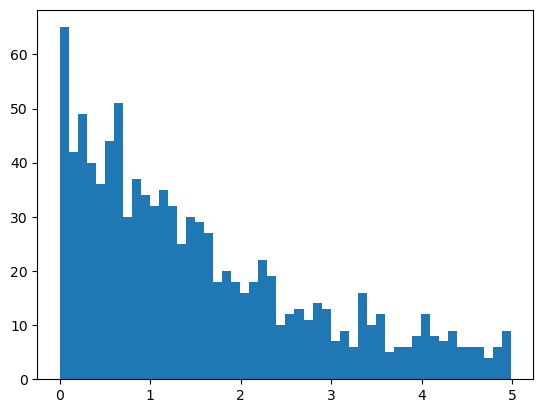

In [11]:
plt.hist(exponential_data, bins=40)
plt.show()

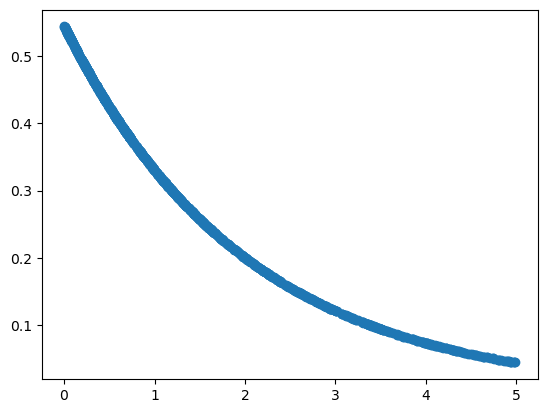

In [12]:
probs = 1/ (2*(1-np.exp(-5/2)))*np.exp(-exponential_data/2) 
plt.plot(exponential_data, probs, 'o')
nll_2 = sk.two_nll(exponential_data, probs)

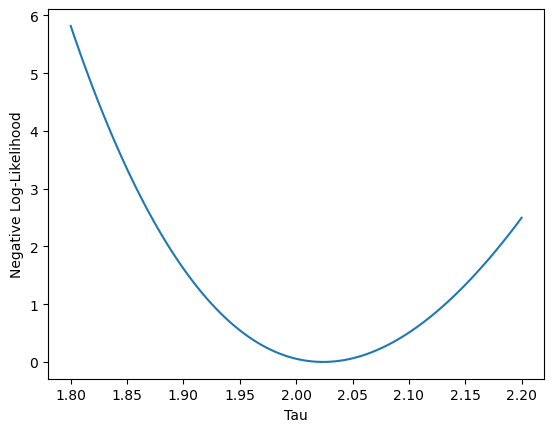

In [13]:
taus = np.linspace(1.8, 2.2, 100)
nlls = []
for tau in taus:
    probs = 1/ (tau*(1-np.exp(-5/tau)))*np.exp(-exponential_data/tau)  
    nlls.append(sk.two_nll(exponential_data, probs))

nlls = nlls - np.min(nlls)
plt.plot(taus, nlls)
plt.xlabel('Tau')
plt.ylabel('Negative Log-Likelihood')
plt.show()


# 2B)


(array([74, 61, 54, 43, 57, 60, 33, 46, 42, 43, 34, 35, 37, 31, 17, 27, 21,
       25, 23, 16, 16, 15, 14, 18, 10, 10, 14, 14, 14,  6,  8,  9, 15,  9,
       12,  6,  7,  6,  8, 10], dtype=int64), array([4.18392263e-03, 1.28752916e-01, 2.53321909e-01, 3.77890903e-01,
       5.02459896e-01, 6.27028889e-01, 7.51597883e-01, 8.76166876e-01,
       1.00073587e+00, 1.12530486e+00, 1.24987386e+00, 1.37444285e+00,
       1.49901184e+00, 1.62358084e+00, 1.74814983e+00, 1.87271882e+00,
       1.99728782e+00, 2.12185681e+00, 2.24642580e+00, 2.37099480e+00,
       2.49556379e+00, 2.62013278e+00, 2.74470178e+00, 2.86927077e+00,
       2.99383976e+00, 3.11840876e+00, 3.24297775e+00, 3.36754674e+00,
       3.49211574e+00, 3.61668473e+00, 3.74125372e+00, 3.86582272e+00,
       3.99039171e+00, 4.11496070e+00, 4.23952970e+00, 4.36409869e+00,
       4.48866768e+00, 4.61323668e+00, 4.73780567e+00, 4.86237466e+00,
       4.98694366e+00]))


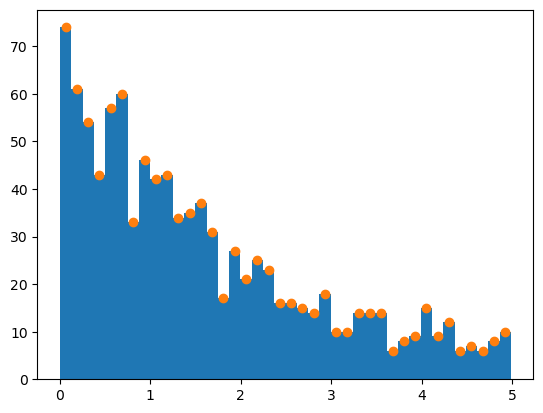

In [14]:
data = pd.read_csv('exponential_data.txt', header=None).to_numpy().flatten()
bins = 40

number_per_bin, bin_edges = np.histogram(data, bins=bins)
centers_bin = 0.5*(bin_edges[1:] + bin_edges[:-1])
print(np.histogram(data, bins=bins))
plt.hist(data, bins=bins)
plt.plot(centers_bin, number_per_bin, 'o')
plt.show()  


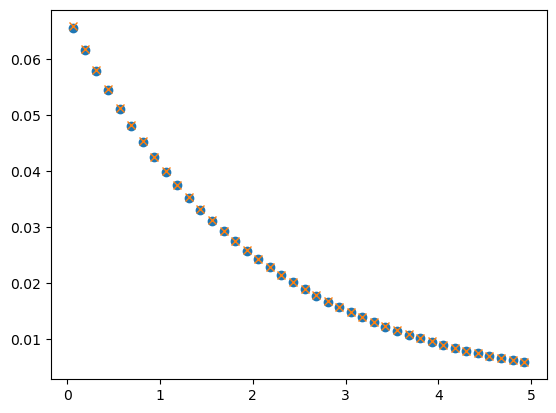

In [15]:
import scipy.integrate
def pdf(x, tau):
    return 1/ (tau*(1-np.exp(-5/tau)))*np.exp(-x/tau)

def bin_probs_approximation(centers, tau, bin_width):
    return pdf(centers, tau) * bin_width

def bin_probs_exact(centers, tau, bin_edges):
    bin_probs = []
    for i in range(len(centers)):
        bin_probs.append(scipy.integrate.quad(pdf, bin_edges[i], bin_edges[i+1], args=(tau,))[0])
    return bin_probs
    
bin_probs_approx = bin_probs_approximation(centers_bin, 2, 5/bins)
bin_probs_exactemente = bin_probs_exact(centers_bin, 2, bin_edges)
plt.plot(centers_bin, bin_probs_exactemente, 'o')
plt.plot(centers_bin, bin_probs_approx, 'x')
    #integrate the pdf 



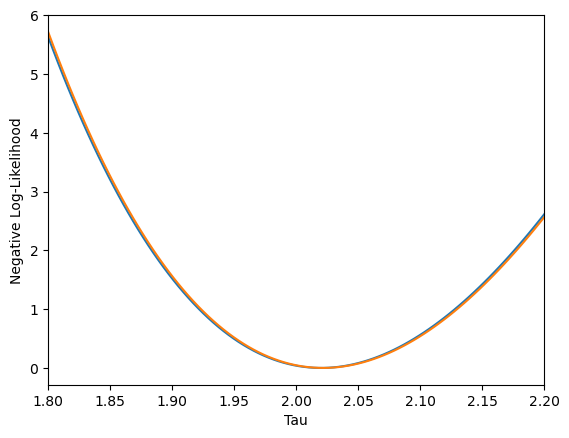

In [22]:
#get the bin log likelihood
def two_bin_nll(number_per_bin, bin_probs):
    return -2*np.sum(number_per_bin * np.log(bin_probs)- bin_probs)

taus = np.linspace(1.8, 2.2, 100)
nlls = []
for tau in taus:
    bin_probs = bin_probs_exact(centers_bin, tau, bin_edges)
    nlls.append(two_bin_nll(number_per_bin, bin_probs))



nlls = nlls - np.min(nlls)
plt.plot(taus, nlls)

for i, tau in enumerate(taus):
    bin_probs = bin_probs_approximation(centers_bin, tau, 5/bins)
    nlls[i] = two_bin_nll(number_per_bin, bin_probs)
nlls = nlls - np.min(nlls)
plt.plot(taus, nlls)

plt.xlabel('Tau')
plt.ylabel('Negative Log-Likelihood')
plt.xlim(1.8, 2.2)
plt.show()
